In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import np_utils
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, InputLayer, Flatten, MaxPooling2D, Conv2D, Flatten
from keras.optimizers import RMSprop,SGD
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import tensorflow as tf
import seaborn
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from nltk.book import  FreqDist

Using TensorFlow backend.


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [140]:
file = open('labABC.txt','r')
counter = 0
Ye = np.zeros((86*81,))
l = []
for i in range(0,88):
    if(i == 2 or i ==12):
        continue
    for i in range(0,9):
        line = file.readline()
        #print(line)
        for c in line:
            if(c != '\n'):
                Ye[counter] = float(c)
                l.append(c)
                counter+=1
    line = file.readline()
    print('#',line)
    
print(Ye)
print(Ye.shape)
#print(len(l))
#print(l)

    

# 1000

# 1001

# 1003

# 1004

# 1005

# 1006

# 1007

# 1008

# 1009

# 1010

# 1011

# 1013

# 1014

# 1015

# 1016

# 1017

# 1018

# 1019

# 1020

# 1021

# 1022

# 1023

# 1024

# 1025

# 1026

# 1027

# 1028

# 1029

# 1030

# 1031

# 1032

# 1033

# 1034

# 1035

# 1036

# 1037

# 1038

# 1039

# 1040

# 1041

# 1042

# 1043

# 1044

# 1045

# 1046

# 1047

# 1048

# 1049

# 1050

# 1051

# 1052

# 1053

# 1054

# 1055

# 1056

# 1057

# 1058

# 1059

# 1060

# 1061

# 1062

# 1063

# 1064

# 1065

# 1066

# 1067

# 1068

# 1069

# 1070

# 1071

# 1072

# 1073

# 1074

# 1075

# 1076

# 1077

# 1078

# 1079

# 1080

# 1081

# 1082

# 1083

# 1084

# 1085

# 1086

# 1087

[0. 0. 6. ... 6. 0. 0.]
(6966,)


In [142]:
def check(name):
    img = cv2.imread('datasets/'+ name +'.jpg')
    plt.imshow(img,cmap = 'gray')
    label = Ye[int(name.split('-')[0])]
    print(label)
    return label,img
def checkV2(name):
    img = cv2.imread('datasetsV2/'+ name +'.jpg')
    #plt.imshow(img,cmap = 'gray')
    label = Ye[int(name.split('-')[0])]
    #print(label)
    return label,img
def checkV3(name):
    img = cv2.imread('datasetsV2/'+ name +'.jpg')
    plt.imshow(img,cmap = 'gray')
    label = Ye[int(name.split('-')[0])]
    print(label)
    return label,img

8.0


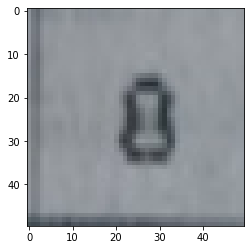

In [8]:
l, img = check('5464-69')

In [9]:
l,img = checkV2('5464-69')

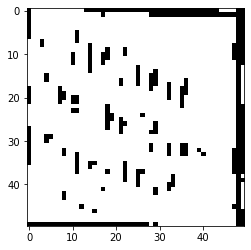

In [10]:
l,img = checkV2('6278-79')
im1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im = cv2.adaptiveThreshold(im1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 33, 10)
#im = cv2.morphologyEx(im,cv2.MORPH_CLOSE, (9,9))
plt.imshow(im,cmap = 'gray')

In [11]:
import numpy as np


def push(stack , item):
    stack.append(item)
    return stack

def pop(stack):
    new_stack = stack[1:]
    return new_stack, stack[0]
def empty(stack):
    #print('\nlen',len(stack))
    if (len(stack) == 0):
        return True
    return False

def Boundaries(x, y, dimension):
    if (y < dimension[0] and -1 < y and x < dimension[1] and -1 < x):
        return True
    else: return False

def Float(i, j, Matrix, Visited, dimension, BW):

    Area = []
    Stack = [[j,i]]
    Visited[i,j] = 1
    x = 0
    y = 0
    #print('\nstart ..')
    while(not empty(Stack)):

        Stack,Cell = pop(Stack)

        x = Cell[0] + 1
        y = Cell[1]
        if (Boundaries(x, y, dimension) and Visited[y,x] == 0 and Matrix[y,x] == BW):
            #print('\nc-1 ..')
            Area.append([x,y])
            push(Stack, [x,y])
            Visited[y, x] = 1
        x = Cell[0]
        y = Cell[1] + 1
        if (Boundaries(x, y, dimension) and Visited[y,x] == 0 and Matrix[y,x] == BW):
            #print('\nc-2 ..')
            Area.append([x,y])
            push(Stack, [x, y])
            Visited[y, x] = 1
        x = Cell[0] + 1
        y = Cell[1] + 1
        if (Boundaries(x, y, dimension) and Visited[y,x] == 0 and Matrix[y,x] == BW):
            #print('\nc-3 ..')
            Area.append([x,y])
            push(Stack, [x, y])
            Visited[y, x] = 1
        x = Cell[0] - 1
        y = Cell[1]
        if (Boundaries(x, y, dimension) and Visited[y,x] == 0 and Matrix[y,x] == BW):
            #print('\nc-4 ..')
            Area.append([x,y])
            push(Stack, [x, y])
            Visited[y, x] = 1
        x = Cell[0]
        y = Cell[1] - 1
        if (Boundaries(x, y, dimension) and Visited[y,x] == 0 and Matrix[y,x] == BW):
            #print('\nc-5 ..')
            Area.append([x,y])
            push(Stack, [x, y])
            Visited[y, x] = 1
        x = Cell[0] - 1
        y = Cell[1] - 1
        if (Boundaries(x, y, dimension) and Visited[y,x] == 0 and Matrix[y,x] == BW):
            #print('\nc-6 ..')
            Area.append([x,y])
            push(Stack, [x, y])
            Visited[y, x] = 1
        x = Cell[0] - 1
        y = Cell[1] + 1
        if (Boundaries(x, y, dimension) and Visited[y,x] == 0 and Matrix[y,x] == BW):
            #print('\nc-7 ..')
            Area.append([x,y])
            push(Stack, [x, y])
            Visited[y, x] = 1
        x = Cell[0] + 1
        y = Cell[1] - 1
        if (Boundaries(x, y, dimension) and Visited[y,x] == 0 and Matrix[y,x] == BW):
            #print('\nc-8 ..')
            Area.append([x, y])
            push(Stack, [x, y])
            Visited[y, x] = 1


    return Area

In [12]:


img = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                [0,0,0,0,0,1,1,1,1,0,0,0,0,0],
                [0,0,0,0,0,1,1,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,0,1,0,1],
                [1,0,0,0,0,1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,0,0,0,0,0,1,0,0],
                [1,0,0,0,0,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                [0,0,0,0,0,1,1,1,1,0,0,0,0,0],
                [0,0,0,0,0,1,1,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
dimension = img.shape
#print(img)
#Visited = np.zeros((dimension[0],dimension[1]))
#res = Float(10, 7, img, Visited, dimension)
#print(res)
#print(len(res))

def Floating_Point_Algorithm(Matrix, dimension, BW) :

    Visited = np.zeros((dimension[0],dimension[1]))
    Areas = []
    for i in range(15, 35):
        for j in range(12, 38):
            if(Visited[i][j] == 0 and Matrix[i][j] == BW):
                Area = Float(i, j, Matrix, Visited, dimension, BW)
                if (len(Area) != 0):
                    Areas.append(Area)
    return Areas

In [13]:


for area in areas:
    print(area)
    print('\n___________________\n')
#print(areas)

NameError: name 'areas' is not defined

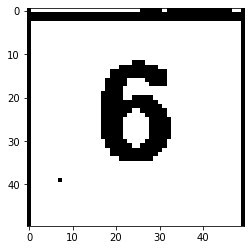

In [17]:
#l,img = checkV2('43-0')
img = cv2.imread('C:/Users/stadia/PycharmProjects/Sod_Sol/Resources/test/16.jpg')
im1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im = cv2.adaptiveThreshold(im1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 33, 10)
#im = cv2.morphologyEx(im,cv2.MORPH_CLOSE, (9,9))

plt.imshow(im,cmap = 'gray')


we initially have 1 areas
after take two most larg we have 1 areas
after thresholding we have 1 areas
length of areas is one


"\nif(result != 0):\n\n    for cell in result:\n        newIM[cell[1]][cell[0]] = 255\n    plt.imshow(newIM,cmap = 'gray')\n    Width, Height = 20, 30\n\n    TransFrom = np.float32([[min_Y, min_X],\n                            [max_Y, min_X],\n                            [min_Y, max_X],\n                            [max_Y, max_X]])\n    TransTo = np.float32([[0, 0], [Height, 0], [0, Width], [Width, Height]])\n    mat = cv2.getPerspectiveTransform(TransFrom, TransTo)\n    imOut = cv2.warpPerspective(newIM, mat, (Width, Height))\n    cv2.imshow('perspective',imOut)\n"

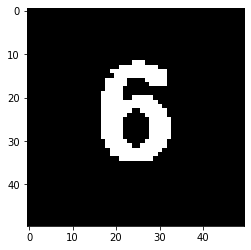

In [18]:
result = []
# step 1
imarr = np.asarray(im)
areas = Floating_Point_Algorithm(imarr, imarr.shape, 0)
print('we initially have ' +str(len(areas)) + ' areas')
filtered_areas2 = []
# step 2 filtering
areas.sort(key=len)
filtered_areas = areas[-2:].copy()
print('after take two most larg we have ' + str(len(filtered_areas)) + ' areas')
for area in filtered_areas:
    if len(area) > 40:
        filtered_areas2.append(area)
print('after thresholding we have ' + str(len(filtered_areas2)) + ' areas')
#print(filtered_areas2)
# step 3 
l = len(filtered_areas2)

max_X = 0
min_X = 50
max_Y = 0
min_Y = 50

if(l == 0):
    print('length of areas is zero')
    print('empty')
    result = 0
elif(l == 1):
    print('length of areas is one')
    max_X = 0
    min_X = 50
    max_Y = 0
    min_Y = 50
    #print(filtered_areas2[0])
    for point in filtered_areas2[0]:
        #print(point[0])
        if(point[0] > max_X):
            max_X = point[0]
        if(point[0] <= min_X):
            min_X = point[0]
        if(point[1] > max_Y):
            max_Y = point[1]
        if(point[1] <= min_Y):
            min_Y = point[1]
    Y_dist = max_Y - min_Y
    X_dist = max_X - min_X
    if(Y_dist > 35 or X_dist > 35):
        print('empty')
        result = 0
    else:
        result = filtered_areas2[0]
else:
    max1 = 0
    max_X1 = 0
    min_X1 = 50
    max_Y1 = 0
    min_Y1 = 50
    for point in filtered_areas2[0]:
        if(point[0] > max_X1):
            max_X1 = point[0]
        if(point[0] <= min_X1):
            min_X1 = point[0]
        if(point[1] > max_Y1):
            max_Y1 = point[1]
        if(point[1] <= min_Y1):
            min_Y1 = point[1]
    Y_dist1 = max_Y1 - min_Y1
    X_dist1 = max_X1 - min_X1
    if(Y_dist1 > X_dist1):
        max1 = Y_dist1
    else:
        max1 = Y_dist1
            
    max2 = 0
    max_X2 = 0
    min_X2 = 50
    max_Y2 = 0
    min_Y2 = 50
    for point in filtered_areas2[1]:
        if(point[0] > max_X2):
            max_X2 = point[0]
        if(point[0] <= min_X2):
            min_X2 = point[0]
        if(point[1] > max_Y2):
            max_Y2 = point[1]
        if(point[1] <= min_Y2):
            min_Y2 = point[1]
    Y_dist2 = max_Y2 - min_Y2
    X_dist2 = max_X2 - min_X2
    
    if(Y_dist2 > X_dist2):    
        max2 = Y_dist2
    else:
        max2 = Y_dist2
    print(max2)
    print(max1)
    if(max2 > max1):
        result = filtered_areas2[0]
         
        max_X = max_X1
        min_X = min_X1
        max_Y = max_Y1
        min_Y = min_Y1
    else:
        result = filtered_areas2[1]
        
        max_X = max_X2
        min_X = min_X2
        max_Y = max_Y2
        min_Y = min_Y2
# step 4 perspective
newIM = np.zeros((50,50))
if(result != 0):
    for cell in result:
        newIM[cell[1]][cell[0]] = 255
    plt.imshow(newIM,cmap = 'gray')

'''
if(result != 0):

    for cell in result:
        newIM[cell[1]][cell[0]] = 255
    plt.imshow(newIM,cmap = 'gray')
    Width, Height = 20, 30

    TransFrom = np.float32([[min_Y, min_X],
                            [max_Y, min_X],
                            [min_Y, max_X],
                            [max_Y, max_X]])
    TransTo = np.float32([[0, 0], [Height, 0], [0, Width], [Width, Height]])
    mat = cv2.getPerspectiveTransform(TransFrom, TransTo)
    imOut = cv2.warpPerspective(newIM, mat, (Width, Height))
    cv2.imshow('perspective',imOut)
'''     

[[17, 12], [32, 12], [17, 34], [32, 34]]


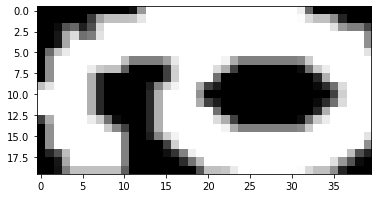

In [19]:
print([[min_X,min_Y],[max_X,min_Y],[min_X,max_Y], [max_X,max_Y]])

if(result != 0):

    
    Width, Height = 40, 20

    TransFrom = np.float32([[min_X,min_Y],[max_X,min_Y],[min_X,max_Y], [max_X,max_Y]])
    TransTo = np.float32([[0, 0], [0, 20], [40, 0], [40, 20]])
    mat = cv2.getPerspectiveTransform(TransFrom, TransTo)
    imOut = cv2.warpPerspective(newIM, mat, (Width, Height))
    plt.imshow(imOut,cmap = 'gray')

In [20]:
from os import listdir
from os.path import isfile, join
images = [f for f in listdir('datasetsV2/') if isfile(join('datasetsV2/', f))]

In [138]:
def hog_compute(image):
    #image = cv2.resize(image,(50,50))
    hog_output_shape = 441
    number_featuers = []
    winSize = (10, 10)
    blockSize = (4, 4)
    blockStride = (1, 1)
    cellSize = (4, 4)
    n_bins = 9
    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, n_bins)
    return np.array(hog.compute(cv2.cvtColor(image,cv2.COLOR_GRAY2BGR), None, None)).reshape((-1, hog_output_shape))

0.0
0.0
4.0
6.0
0.0
4.0
0.0
7.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
8.0
6.0
0.0
3.0
2.0
9.0
0.0
0.0
6.0
0.0
2.0
0.0
9.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
5.0
0.0
0.0
7.0
8.0
4.0
0.0
0.0
0.0
6.0
1.0
5.0
0.0
0.0
0.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
9.0
0.0
8.0
0.0
0.0
7.0
0.0
0.0
1.0
0.0
8.0
0.0
0.0
9.0
5.0
0.0
2.0
0.0
3.0
0.0
4.0
0.0
0.0
0.0
0.0
6.0
9.0
5.0
0.0
1.0
0.0
0.0
0.0
0.0
9.0
2.0
0.0
4.0
5.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
3.0
7.0
1.0
0.0
0.0
0.0
9.0
0.0
2.0
0.0
0.0
1.0
0.0
6.0
8.0
0.0
0.0
0.0
8.0
0.0
4.0
0.0
2.0
0.0
0.0
1.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
9.0
0.0
0.0
8.0
2.0
0.0
0.0
7.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
0.0
2.0
0.0
0.0
7.0
0.0
9.0
0.0
0.0
0.0
0.0
0.0
9.0
2.0
1.0
0.0
7.0
6.0
0.0
5.0
9.0
0.0
8.0
0.0
3.0
8.0
5.0
0.0
0.0
0.0
0.0
4.0
1.0
0.0
7.0
0.0
2.0
0.0
0.0
4.0
5.0
0.0
0.0
5.0
1.0
0.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.0
0.0
0.0
1.0
0.0
0.0
4.0
0.0
3.0
9.0
7.0
4.0
0.0
1.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
3.0
0.0


0.0
0.0
0.0
0.0
1.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
6.0
0.0
0.0
8.0
0.0
8.0
0.0
0.0
7.0
0.0
0.0
0.0
6.0
0.0
5.0
2.0
9.0
0.0
1.0
0.0
0.0
8.0
0.0
0.0
5.0
8.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
3.0
0.0
1.0
0.0
6.0
0.0
7.0
6.0
0.0
0.0
1.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
4.0
5.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
1.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
0.0
1.0
6.0
2.0
0.0
0.0
0.0
0.0
0.0
9.0
8.0
4.0
0.0
0.0
0.0
0.0
8.0
0.0
5.0
0.0
0.0
1.0
5.0
3.0
0.0
0.0
7.0
0.0
2.0
0.0
0.0
0.0
5.0
0.0
3.0
0.0
9.0
1.0
0.0
0.0
0.0
5.0
3.0
0.0
0.0
0.0
4.0
0.0
7.0
6.0
1.0
0.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
0.0
3.0
0.0
0.0
8.0
0.0
6.0
4.0
0.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
5.0
0.0
9.0
0.0
0.0
0.0
8.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
8.0
9.0
6.0
0.0
3.0
7.0
5.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
0.0
9.0
0.0
0.0
1.0
7.0
0.0
4.0
5.0
7.0


0.0
0.0
0.0
3.0
0.0
0.0
0.0
9.0
0.0
5.0
0.0
6.0
5.0
0.0
9.0
0.0
0.0
0.0
2.0
7.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
5.0
0.0
0.0
0.0
2.0
0.0
0.0
1.0
0.0
0.0
3.0
0.0
5.0
3.0
4.0
9.0
0.0
0.0
8.0
0.0
0.0
0.0
0.0
4.0
2.0
8.0
0.0
0.0
0.0
0.0
5.0
5.0
0.0
0.0
0.0
0.0
0.0
9.0
0.0
7.0
8.0
0.0
9.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
6.0
8.0
0.0
0.0
0.0
9.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
9.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
2.0
0.0
4.0
7.0
0.0
0.0
6.0
0.0
0.0
0.0
0.0
6.0
1.0
0.0
4.0
5.0
0.0
6.0
0.0
0.0
0.0
0.0
0.0
9.0
1.0
0.0
0.0
0.0
0.0
7.0
2.0
5.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
3.0
4.0
0.0
0.0
6.0
0.0
7.0
0.0
2.0
0.0
0.0
9.0
3.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
3.0
1.0
0.0
0.0
2.0
0.0
0.0
0.0
6.0
0.0
5.0
0.0
0.0
0.0
3.0
0.0
6.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
8.0
0.0
0.0
4.0
8.0
0.0
6.0
0.0
0.0
0.0
2.0
6.0
0.0
7.0
9.0
0.0
3.0
8.0
0.0
0.0
4.0
8.0
2.0
3.0
1.0
4.0
0.0
9.0
0.0
0.0
0.0
0.0
7.0
0.0
9.0
1.0
0.0
0.0
0.0
0.0
9.0
0.0
6.0
0.0
3.0
0.0
0.0
0.0
9.0
4.0
0.0


0.0
3.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
0.0
8.0
0.0
0.0
0.0
0.0
0.0
9.0
4.0
2.0
0.0
0.0
0.0
3.0
0.0
6.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
4.0
0.0
9.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
2.0
5.0
0.0
0.0
9.0
6.0
1.0
0.0
0.0
6.0
9.0
4.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
2.0
0.0
0.0
4.0
5.0
0.0
2.0
7.0
0.0
0.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
4.0
0.0
7.0
0.0
0.0
2.0
6.0
6.0
0.0
8.0
7.0
0.0
9.0
3.0
3.0
5.0
7.0
1.0
0.0
0.0
0.0
4.0
0.0
2.0
0.0
6.0
9.0
0.0
0.0
5.0
0.0
0.0
0.0
0.0
1.0
1.0
3.0
0.0
6.0
0.0
0.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
1.0
0.0
8.0
0.0
6.0
0.0
0.0
0.0
5.0
8.0
5.0
0.0
0.0
0.0
3.0
0.0
4.0
0.0
0.0
0.0
9.0
0.0
0.0
5.0
0.0
2.0
8.0
0.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
2.0
0.0
8.0
0.0
0.0
3.0
0.0
0.0
6.0
9.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
9.0
0.0
0.0
1.0
0.0
0.0
5.0
0.0
0.0
4.0
0.0
7.0
0.0
0.0
0.0
0.0
9.0
8.0
3.0
0.0
0.0
9.0
0.0
0.0
0.0
5.0
0.0
7.0
0.0
4.0
0.0
0.0
9.0
0.0
2.0
6.0
0.0
0.0
6.0
0.0
0.0
3.0
0.0


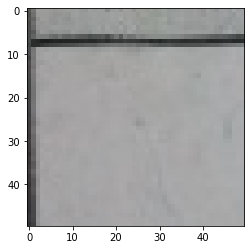

In [179]:
datasets = []
for name in images:
    label,img = checkV3(name.split('.')[0])
    if(label != 0):
        #datasets.append((l,img))
        im1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        im = cv2.adaptiveThreshold(im1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 33, 10)
        result = []
        # step 1
        imarr = np.asarray(im)
        areas = Floating_Point_Algorithm(imarr, imarr.shape, 0)
        #print('we initially have ' +str(len(areas)) + ' areas')
        filtered_areas2 = []
        # step 2 filtering
        areas.sort(key=len)
        filtered_areas = areas[-2:].copy()
        #print('after take two most larg we have ' + str(len(filtered_areas)) + ' areas')
        for area in filtered_areas:
            if len(area) > 40:
                filtered_areas2.append(area)
        #print('after thresholding we have ' + str(len(filtered_areas2)) + ' areas')
        #print(filtered_areas2)
        # step 3 
        l = len(filtered_areas2)

        max_X = 0
        min_X = 50
        max_Y = 0
        min_Y = 50

        if(l == 0):
            #print('length of areas is zero')
            print('empty '+ name + '-' + str(l))
            result = 0
        elif(l == 1):
            #print('length of areas is one')
            max_X = 0
            min_X = 50
            max_Y = 0
            min_Y = 50
            #print(filtered_areas2[0])
            for point in filtered_areas2[0]:
                #print(point[0])
                if(point[0] > max_X):
                    max_X = point[0]
                if(point[0] <= min_X):
                    min_X = point[0]
                if(point[1] > max_Y):
                    max_Y = point[1]
                if(point[1] <= min_Y):
                    min_Y = point[1]
            Y_dist = max_Y - min_Y
            X_dist = max_X - min_X
            if(Y_dist > 35 or X_dist > 35):
                print('empty '+ name + '-' + str(l))
                result = 0
            else:
                result = filtered_areas2[0]
        else:
            max1 = 0
            max_X1 = 0
            min_X1 = 50
            max_Y1 = 0
            min_Y1 = 50
            for point in filtered_areas2[0]:
                if(point[0] > max_X1):
                    max_X1 = point[0]
                if(point[0] <= min_X1):
                    min_X1 = point[0]
                if(point[1] > max_Y1):
                    max_Y1 = point[1]
                if(point[1] <= min_Y1):
                    min_Y1 = point[1]
            Y_dist1 = max_Y1 - min_Y1
            X_dist1 = max_X1 - min_X1
            if(Y_dist1 > X_dist1):
                max1 = Y_dist1
            else:
                max1 = Y_dist1
            
            max2 = 0
            max_X2 = 0
            min_X2 = 50
            max_Y2 = 0
            min_Y2 = 50
            for point in filtered_areas2[1]:
                if(point[0] > max_X2):
                    max_X2 = point[0]
                if(point[0] <= min_X2):
                    min_X2 = point[0]
                if(point[1] > max_Y2):
                    max_Y2 = point[1]
                if(point[1] <= min_Y2):
                    min_Y2 = point[1]
            Y_dist2 = max_Y2 - min_Y2
            X_dist2 = max_X2 - min_X2
    
            if(Y_dist2 > X_dist2):    
                max2 = Y_dist2
            else:
                max2 = Y_dist2
            #print(max2)
            #print(max1)
            if(max2 > max1):
                result = filtered_areas2[0]
         
                max_X = max_X1
                min_X = min_X1
                max_Y = max_Y1
                min_Y = min_Y1
            else:
                result = filtered_areas2[1]
        
                max_X = max_X2
                min_X = min_X2
                max_Y = max_Y2
                min_Y = min_Y2
        # step 4 perspective
        newIM = np.zeros((50,50))
        if(result != 0):
            for cell in result:
                newIM[cell[1]][cell[0]] = 255
                #plt.imshow(newIM,cmap = 'gray')
            #Width, Height = 40, 20

            TransFrom = np.float32([[min_X,min_Y],[max_X,min_Y],[min_X,max_Y], [max_X,max_Y]])
            TransTo = np.float32([[0, 0], [0, 10], [20, 0], [20, 10]])
            mat = cv2.getPerspectiveTransform(TransFrom, TransTo)
            imOut = cv2.warpPerspective(newIM, mat, (20,10))
            
            ret,imOut = cv2.threshold(imOut,100,255,cv2.THRESH_BINARY)
            cv2.imwrite('feature/'+ name.split('.')[0] + '-' + str(int(label)) +'.'+ name.split('.')[1],imOut)
            datasets.append((imOut,name.split('.')[0] + '-' + str(int(label)) +'.'+ name.split('.')[1]))

1018-14-6.jpg
2490


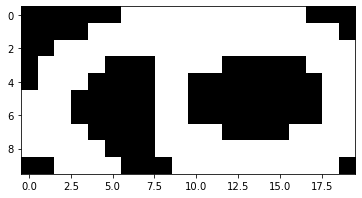

In [167]:
print(datasets[11][1]) 
plt.imshow(datasets[11][0],cmap = 'gray')
print(len(datasets))

In [180]:
print(images[1000:1081])

['1899-25.jpg', '19-0.jpg', '190-3.jpg', '1900-25.jpg', '1901-25.jpg', '1902-25.jpg', '1903-25.jpg', '1904-25.jpg', '1905-25.jpg', '1906-25.jpg', '1907-25.jpg', '1908-25.jpg', '1909-25.jpg', '191-3.jpg', '1910-25.jpg', '1911-25.jpg', '1912-25.jpg', '1913-25.jpg', '1914-25.jpg', '1915-25.jpg', '1916-25.jpg', '1917-25.jpg', '1918-25.jpg', '1919-25.jpg', '192-3.jpg', '1920-25.jpg', '1921-25.jpg', '1922-25.jpg', '1923-25.jpg', '1924-25.jpg', '1925-25.jpg', '1926-25.jpg', '1927-25.jpg', '1928-25.jpg', '1929-25.jpg', '193-3.jpg', '1930-25.jpg', '1931-25.jpg', '1932-25.jpg', '1933-25.jpg', '1934-25.jpg', '1935-25.jpg', '1936-25.jpg', '1937-25.jpg', '1938-25.jpg', '1939-25.jpg', '194-3.jpg', '1940-25.jpg', '1941-25.jpg', '1942-25.jpg', '1943-25.jpg', '1944-26.jpg', '1945-26.jpg', '1946-26.jpg', '1947-26.jpg', '1948-26.jpg', '1949-26.jpg', '195-3.jpg', '1950-26.jpg', '1951-26.jpg', '1952-26.jpg', '1953-26.jpg', '1954-26.jpg', '1955-26.jpg', '1956-26.jpg', '1957-26.jpg', '1958-26.jpg', '1959-26.

In [181]:
data = [f for f in listdir('feature/') if isfile(join('feature/', f))]
particular = [f for f in listdir('particular samples/') if isfile(join('particular samples/', f))]

In [182]:
a = [[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3]]
print(np.asarray(a).shape)

(6, 3)


In [183]:
Y = np.zeros((2477,9))
X = []
counter = 0
for sample in datasets:
    if(sample[1] not in particular):
        X.append(np.asarray(sample[0]))
        Y[counter][int(sample[1].split('-')[2].split('.')[0]) - 1] = 1
        counter +=1
X = np.asarray(X)       

[0. 0. 0. 0. 0. 0. 1. 0. 0.]
(10, 20)


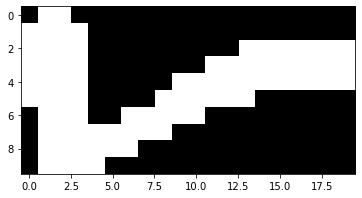

In [184]:
print(Y[2470])
print(X[2470].shape)
plt.imshow(X[2470],cmap = 'gray')

In [185]:
print(X.shape)
Y.shape

(2477, 10, 20)


(2477, 9)

In [186]:
number_list = X[2470].astype(int)

(unique, counts) = np.unique(number_list, return_counts=True)
print(unique)
print(counts)

[  0 255]
[119  81]


In [187]:
       
#cv2.cvtColor(np.zeros((100,100,1)).astype(int),cv2.COLOR_GRAY2BGR)
v = hog_compute(cv2.imread('numeric data/17-0.jpg',0))
#print(v)

(1114, 10, 20)
(1363, 10, 20)
(1114, 9)
(1363, 9)
[[  0.   0.   0.   0. 255. 255. 255.   0.   0.   0.   0.   0. 255. 255.
  255. 255. 255. 255.   0.   0.]
 [  0.   0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255.]
 [  0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255.]
 [  0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.   0.
    0.   0. 255. 255. 255. 255.]
 [  0. 255. 255. 255. 255.   0.   0.   0.   0. 255. 255. 255.   0.   0.
    0.   0.   0. 255. 255. 255.]
 [255. 255. 255. 255. 255.   0.   0.   0.   0. 255. 255. 255.   0.   0.
    0.   0.   0. 255. 255. 255.]
 [  0. 255. 255. 255. 255.   0.   0.   0. 255. 255. 255. 255.   0.   0.
    0.   0.   0. 255. 255. 255.]
 [  0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255.]
 [  0.   0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255.]
 [  0

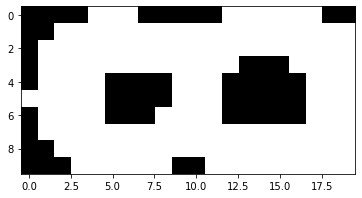

In [193]:
training_set_size = int(X.shape[0]*0.45)


X_train = X[:training_set_size]
y_train = Y[:training_set_size]

X_test = X[training_set_size:]
y_test = Y[training_set_size:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[100])
X_train=X_train/255.0
X_test=X_test/255.0

print(X_train[100])
plt.imshow(X_train[100],cmap = 'gray')
print(y_train[100])
#print(y_train[100])

In [194]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(10, 20)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(9,activation='softmax')
])
model.compile(loss='categorical_crossentropy',  metrics=['categorical_crossentropy','accuracy'] ,optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010      
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 99        
Total params: 2,109
Trainable params: 2,109
Non-trainable params: 0
_________________________________________________________________


In [195]:
trained_model=model.fit(X_train, y_train,validation_data=(X_test,y_test),batch_size=256, epochs=100)

Train on 1114 samples, validate on 1363 samples
Epoch 1/100
1114/1114 [==============================] - 1s 680us/sample - loss: 2.4296 - categorical_crossentropy: 2.4296 - accuracy: 0.0943 - val_loss: 2.2553 - val_categorical_crossentropy: 2.2553 - val_accuracy: 0.1548
Epoch 2/100
1114/1114 [==============================] - 0s 32us/sample - loss: 2.2294 - categorical_crossentropy: 2.2294 - accuracy: 0.1813 - val_loss: 2.1097 - val_categorical_crossentropy: 2.1097 - val_accuracy: 0.2267
Epoch 3/100
1114/1114 [==============================] - 0s 35us/sample - loss: 2.0828 - categorical_crossentropy: 2.0828 - accuracy: 0.2504 - val_loss: 2.0227 - val_categorical_crossentropy: 2.0227 - val_accuracy: 0.2428
Epoch 4/100
1114/1114 [==============================] - 0s 34us/sample - loss: 1.9960 - categorical_crossentropy: 1.9960 - accuracy: 0.2711 - val_loss: 1.9680 - val_categorical_crossentropy: 1.9680 - val_accuracy: 0.2700
Epoch 5/100
1114/1114 [==============================] - 0s 36u

1114/1114 [==============================] - 0s 34us/sample - loss: 0.4378 - categorical_crossentropy: 0.4378 - accuracy: 0.9192 - val_loss: 0.4396 - val_categorical_crossentropy: 0.4396 - val_accuracy: 0.9376
Epoch 38/100
1114/1114 [==============================] - 0s 38us/sample - loss: 0.4127 - categorical_crossentropy: 0.4127 - accuracy: 0.9282 - val_loss: 0.4137 - val_categorical_crossentropy: 0.4137 - val_accuracy: 0.9450
Epoch 39/100
1114/1114 [==============================] - 0s 37us/sample - loss: 0.3892 - categorical_crossentropy: 0.3892 - accuracy: 0.9354 - val_loss: 0.3901 - val_categorical_crossentropy: 0.3901 - val_accuracy: 0.9589
Epoch 40/100
1114/1114 [==============================] - 0s 31us/sample - loss: 0.3656 - categorical_crossentropy: 0.3656 - accuracy: 0.9479 - val_loss: 0.3669 - val_categorical_crossentropy: 0.3669 - val_accuracy: 0.9640
Epoch 41/100
1114/1114 [==============================] - 0s 32us/sample - loss: 0.3439 - categorical_crossentropy: 0.343

Epoch 74/100
1114/1114 [==============================] - 0s 32us/sample - loss: 0.0474 - categorical_crossentropy: 0.0474 - accuracy: 1.0000 - val_loss: 0.0539 - val_categorical_crossentropy: 0.0539 - val_accuracy: 0.9985
Epoch 75/100
1114/1114 [==============================] - 0s 36us/sample - loss: 0.0453 - categorical_crossentropy: 0.0453 - accuracy: 1.0000 - val_loss: 0.0519 - val_categorical_crossentropy: 0.0519 - val_accuracy: 0.9985
Epoch 76/100
1114/1114 [==============================] - 0s 33us/sample - loss: 0.0435 - categorical_crossentropy: 0.0435 - accuracy: 1.0000 - val_loss: 0.0501 - val_categorical_crossentropy: 0.0501 - val_accuracy: 0.9985
Epoch 77/100
1114/1114 [==============================] - 0s 30us/sample - loss: 0.0418 - categorical_crossentropy: 0.0418 - accuracy: 1.0000 - val_loss: 0.0485 - val_categorical_crossentropy: 0.0485 - val_accuracy: 0.9985
Epoch 78/100
1114/1114 [==============================] - 0s 33us/sample - loss: 0.0402 - categorical_crosse

In [196]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

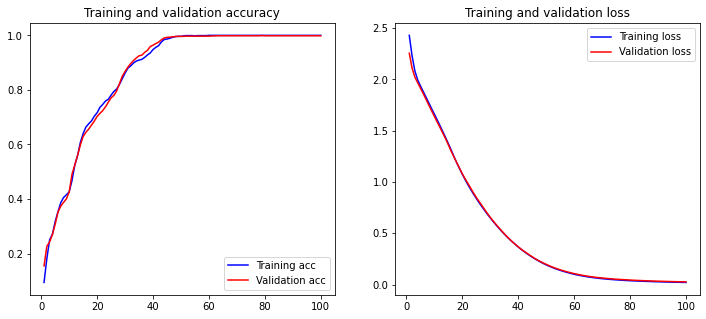

In [197]:
plot_history(trained_model)

In [198]:
accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: ",accuracy[2])
accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: ",accuracy[2])

Training Accuracy:  1.0
Testing Accuracy:  0.99853265


In [60]:
a = np.asarray([[1,2],[1,2]])
b = np.asarray([[1,2],[1,2]])

a1 = [[1,2],[1,2]]
b1 = [[1,2],[1,2]]

li = [a,b]
li1 = [a1,b1]
arr = np.asarray(li)
arr1 = np.asarray(li1)
print(len(li[1]))
print(arr.shape)
print(arr1.shape)

2
(2, 2, 2)
(2, 2, 2)


In [166]:
predictions = model.predict(np.array([X_test[0]]))
print(predictions)

[[3.1068679e-15 1.6836993e-16 1.7532762e-05 5.4666882e-11 1.3372865e-24
  2.3403254e-15 9.9998248e-01 8.3448352e-11 2.1699046e-14]]


In [163]:
#########model.save('.h5') 

In [294]:
new_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(10, 20)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(9,activation='softmax')
])

new_model.load_weights('r_digits.h5')

In [288]:
new_predictions = new_model.predict(X_test)

[6.0631337e-05 9.8328269e-01 7.6173659e-04 1.6243416e-03 3.0131329e-07
 1.2074829e-04 1.1443208e-03 6.2379200e-04 1.2381315e-02]
[6.0631337e-05 9.8328269e-01 7.6173659e-04 1.6243416e-03 3.0131329e-07
 1.2074829e-04 1.1443208e-03 6.2379200e-04 1.2381315e-02]
[0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


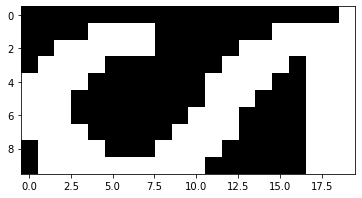

In [289]:
Index = 1201
print(predictions[Index])
print(new_predictions[Index])
print(y_test[Index])
plt.imshow(X_test[Index],cmap = 'gray')
print(decode(predictions[Index]))

In [219]:
import datetime

In [239]:
#current_time = datetime.datetime.now()  
    
# Printing value of now.  
#print ("Time now at greenwich meridian is : "
#                                    , end = "")  
#print (list(current_time))  

In [236]:
def decode(y):
    L = list(y)
    MAX = 0
    INDEX = -1
    for i in range(0,len(L)):
        if(L[i] > MAX):
            MAX = L[i] 
            INDEX = i
    return INDEX + 1

In [265]:
def OCR(Digits):
    output = []
    
    for i in range(0,len(Digits)):
    
        #datasets.append((l,img))
        im1 = cv2.cvtColor(Digits[i], cv2.COLOR_BGR2GRAY)
        im = cv2.adaptiveThreshold(im1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 33, 10)
        result = []
        # step 1
        imarr = np.asarray(im)
        areas = Floating_Point_Algorithm(imarr, imarr.shape, 0)
        #print('we initially have ' +str(len(areas)) + ' areas')
        filtered_areas2 = []
        # step 2 filtering
        areas.sort(key=len)
        filtered_areas = areas[-2:].copy()
        #print('after take two most larg we have ' + str(len(filtered_areas)) + ' areas')
        for area in filtered_areas:
            if len(area) > 40:
                filtered_areas2.append(area)
        #print('after thresholding we have ' + str(len(filtered_areas2)) + ' areas')
        #print(filtered_areas2)
        # step 3 
        l = len(filtered_areas2)

        max_X = 0
        min_X = 50
        max_Y = 0
        min_Y = 50

        if(l == 0):
            #print('length of areas is zero')
            #print('empty '+ name + '-' + str(l))
            output.append(0)
            result = 0
        elif(l == 1):
            #print('length of areas is one')
            max_X = 0
            min_X = 50
            max_Y = 0
            min_Y = 50
            #print(filtered_areas2[0])
            for point in filtered_areas2[0]:
                #print(point[0])
                if(point[0] > max_X):
                    max_X = point[0]
                if(point[0] <= min_X):
                    min_X = point[0]
                if(point[1] > max_Y):
                    max_Y = point[1]
                if(point[1] <= min_Y):
                    min_Y = point[1]
            Y_dist = max_Y - min_Y
            X_dist = max_X - min_X
            if(Y_dist > 35 or X_dist > 35):
                #print('empty '+ name + '-' + str(l))
                output.append(0)
                result = 0
            else:
                result = filtered_areas2[0]
        else:
            max1 = 0
            max_X1 = 0
            min_X1 = 50
            max_Y1 = 0
            min_Y1 = 50
            for point in filtered_areas2[0]:
                if(point[0] > max_X1):
                    max_X1 = point[0]
                if(point[0] <= min_X1):
                    min_X1 = point[0]
                if(point[1] > max_Y1):
                    max_Y1 = point[1]
                if(point[1] <= min_Y1):
                    min_Y1 = point[1]
            Y_dist1 = max_Y1 - min_Y1
            X_dist1 = max_X1 - min_X1
            if(Y_dist1 > X_dist1):
                max1 = Y_dist1
            else:
                max1 = Y_dist1
            
            max2 = 0
            max_X2 = 0
            min_X2 = 50
            max_Y2 = 0
            min_Y2 = 50
            for point in filtered_areas2[1]:
                if(point[0] > max_X2):
                    max_X2 = point[0]
                if(point[0] <= min_X2):
                    min_X2 = point[0]
                if(point[1] > max_Y2):
                    max_Y2 = point[1]
                if(point[1] <= min_Y2):
                    min_Y2 = point[1]
            Y_dist2 = max_Y2 - min_Y2
            X_dist2 = max_X2 - min_X2
    
            if(Y_dist2 > X_dist2):    
                max2 = Y_dist2
            else:
                max2 = Y_dist2
            #print(max2)
            #print(max1)
            if(max2 > max1):
                result = filtered_areas2[0]
         
                max_X = max_X1
                min_X = min_X1
                max_Y = max_Y1
                min_Y = min_Y1
            else:
                result = filtered_areas2[1]
        
                max_X = max_X2
                min_X = min_X2
                max_Y = max_Y2
                min_Y = min_Y2
        # step 4 perspective
        newIM = np.zeros((50,50))
        if(result != 0):
            for cell in result:
                newIM[cell[1]][cell[0]] = 255
                #plt.imshow(newIM,cmap = 'gray')
            #Width, Height = 40, 20

            TransFrom = np.float32([[min_X,min_Y],[max_X,min_Y],[min_X,max_Y], [max_X,max_Y]])
            TransTo = np.float32([[0, 0], [0, 10], [20, 0], [20, 10]])
            mat = cv2.getPerspectiveTransform(TransFrom, TransTo)
            imOut = cv2.warpPerspective(newIM, mat, (20,10))
            
            ret,imOut = cv2.threshold(imOut,100,255,cv2.THRESH_BINARY)
            prediction = model.predict(np.array([imOut]))[0]
            output.append(decode(prediction))
    return output    

In [304]:


L = []
for i in range(0,81):
    label,img = checkV2(str(i+2592)+'-34')
    L.append(img)
for i in range(0,100):
    OCR(L)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


KeyboardInterrupt: 

In [298]:
L = []
label,img = checkV2(str(1528)+'-20')
L.append(img)
print('ocr : ',OCR(L))

ocr :  [4]


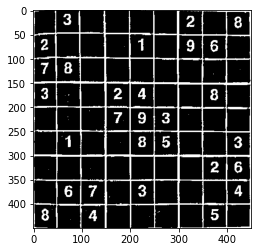

In [56]:
img1 = cv2.imread('test/s1.jpg') 
img2 = cv2.imread('test/s2.jpg')
img3 = cv2.imread('test/s3.jpg')
img4 = cv2.imread('test/s4.jpg')
img5 = cv2.imread('test/s5.jpg')
mask = cv2.imread('test/Mask.jpg')
plt.imshow(cv2.threshold(img2, 127, 255 , cv2.THRESH_BINARY)[1],cmap = 'gray')

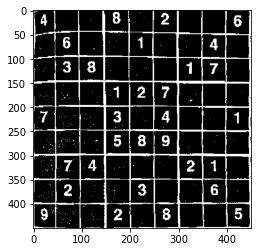

In [57]:
plt.imshow(cv2.threshold(img4, 127, 255 , cv2.THRESH_BINARY)[1],cmap = 'gray')

1
1


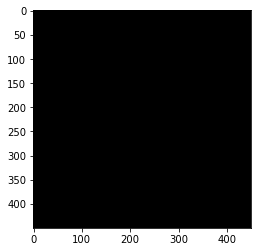

In [58]:
def is_Changed(frame1,frame2,threshold):
    
    
    
    imgt = cv2.bitwise_xor(frame1,frame2)
    
    (unique, counts) = np.unique(imgt, return_counts=True)
    plt.imshow(imgt,cmap = 'gray')
    print(len(counts))
    print(len(unique))
    return 
ret , img21 = cv2.threshold(img2, 127, 255 , cv2.THRESH_BINARY)
ret , img41 = cv2.threshold(img2, 127, 255 , cv2.THRESH_BINARY)
is_Changed(img21,img41,12)

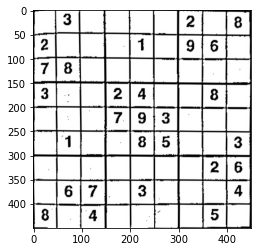

In [331]:
plt.imshow(cv2.bitwise_not(img2,img2),cmap = 'gray')

In [353]:
res = cv2.bitwise_xor(np.array([1]),np.array([0]))
print(res)

[[1]]
